In [2]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.connect('../Database/bank.db')

In [4]:
employees = pd.read_sql("SELECT * FROM Employees", conn)

In [5]:
conn.close()

# Employees

In [6]:
employees.head()

,employee_id,first_name,last_name,position,department,branch_id,hire_date,salary
0,1,Cory,Lara,Customer Service,Management,11,2018-08-12,12268.61
1,2,Carl,Murray,Teller,IT,13,2018-04-07,9074.62
2,3,Deborah,Blair,Credit Officer,Operations,5,2019-07-22,6456.46
3,4,Carolyn,Ramos,IT Officer,IT,7,2020-03-10,1469.32
4,5,Amanda,Whitehead,Customer Service,Customer Service,15,2016-02-08,5149.36


## Missing values?

In [7]:
employees.isna().sum() 

employee_id     0
first_name      0
last_name       0
position        0
department      0
branch_id       0
hire_date       0
salary         42
dtype: int64

## Mean, Max, Min of employees salaries of each department

In [8]:
summary = employees.groupby('department')['salary'].agg(['mean','max','min']).round(2)
summary.columns = ['Mean Salary', 'Max Salary','Min Salary']
summary = summary.sort_values(by='Mean Salary',ascending=False)
summary

,Mean Salary,Max Salary,Min Salary
department,,,
Operations,8618.91,14895.03,903.55
Management,7837.83,14995.39,800.06
Customer Service,7661.76,14692.96,872.96
Retail Banking,7445.55,14983.68,851.72
Financing,7369.96,14939.97,1057.32
IT,7295.97,14898.71,1198.55


## Handeling Missing data

In [ ]:
# filling the salary with the mean of the department salary
employees['salary'] = employees.groupby('department')['salary'].transform(lambda x: x.fillna(x.mean()))

In [10]:
employees.isnull().sum().sum()

0

## Exploratory Data Analysis EDA

In [11]:
numerical_columns = employees.select_dtypes(include='number').columns
categorcial_columns = employees.select_dtypes(include='object').columns

In [33]:
colors = ['#664228','#D95F02','#FF9933','#E6BC5C',"#FED85D","#FBE7B2"]
# Create the color palette with hex colors
sns.color_palette(colors)

[(0.4, 0.25882352941176473, 0.1568627450980392),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (1.0, 0.6, 0.2),
 (0.9019607843137255, 0.7372549019607844, 0.3607843137254902),
 (0.996078431372549, 0.8470588235294118, 0.36470588235294116),
 (0.984313725490196, 0.9058823529411765, 0.6980392156862745)]

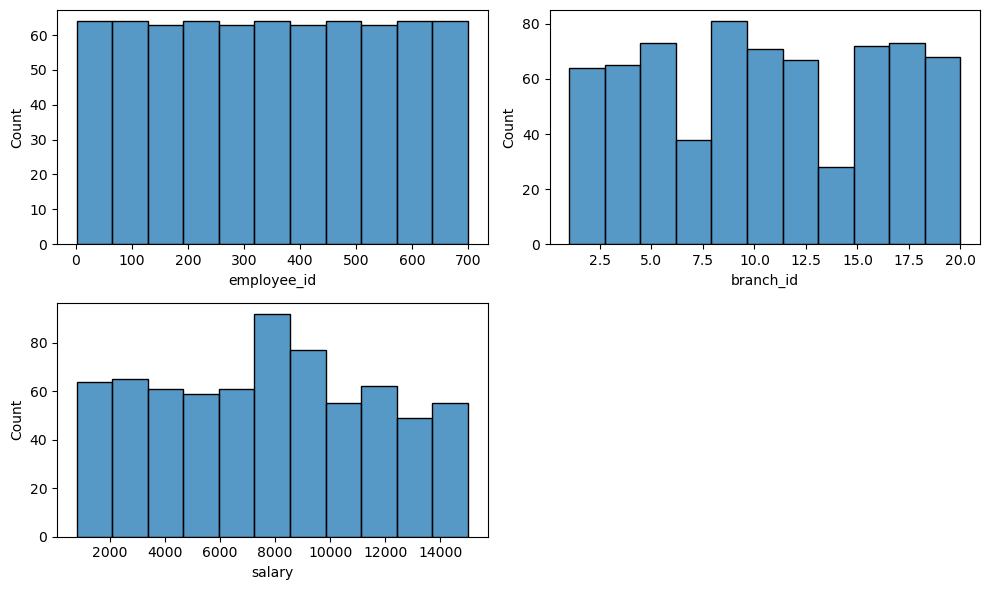

In [26]:
plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data=employees,x=col)
plt.tight_layout()    
plt.show()

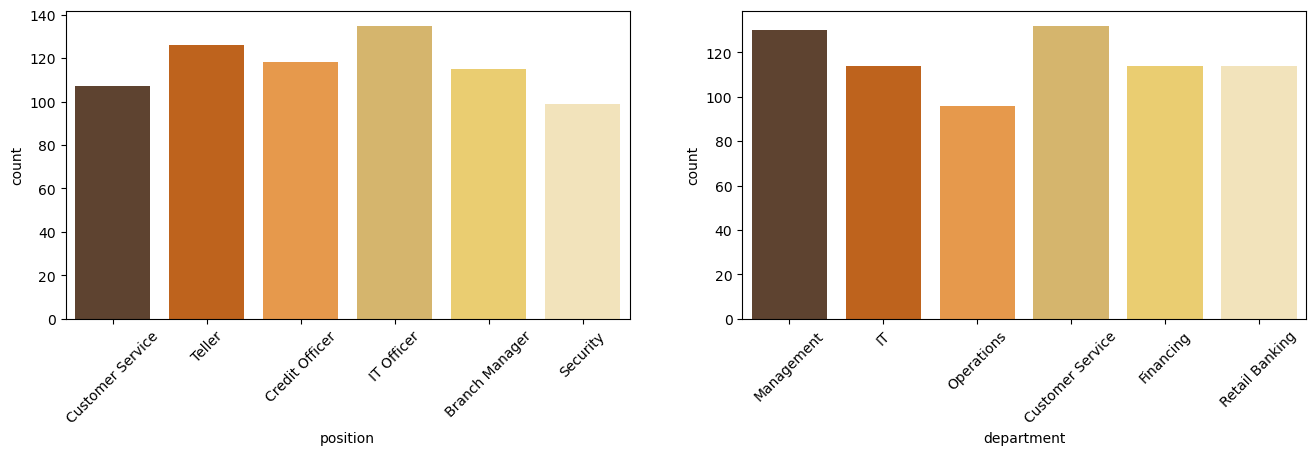

In [34]:
plt.figure(figsize=(16,4))
for i,col in enumerate(['position','department']):
    plt.subplot(1,2,i+1)
    sns.countplot(data=employees,x=col,palette=colors)
    plt.xticks(rotation=45)

plt.show()